<a href="https://colab.research.google.com/github/hassanalla12/RNN/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

           0
0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
...      ...
1253  790.90
1254  790.68
1255  793.70
1256  783.33
1257  782.75

[1258 rows x 1 columns]
             0
0     0.085814
1     0.097012
2     0.094334
3     0.091562
4     0.079842
...        ...
1253  0.952043
1254  0.951633
1255  0.957251
1256  0.937960
1257  0.936881

[1258 rows x 1 columns]
            0         1         2         3         4         5         6   \
0     0.085814  0.097012  0.094334  0.091562  0.079842  0.064328  0.058542   
1     0.097012  0.094334  0.091562  0.079842  0.064328  0.058542  0.065686   
2     0.094334  0.091562  0.079842  0.064328  0.058542  0.065686  0.061091   
3     0.091562  0.079842  0.064328  0.058542  0.065686  0.061091  0.066393   
4     0.079842  0.064328  0.058542  0.065686  0.061091  0.066393  0.061426   
...        ...       ...       ...       ...       ...       ...       ...   
1193  0.934445  0.924939  0.921069  0.924381  0.930482  0.929905  0.

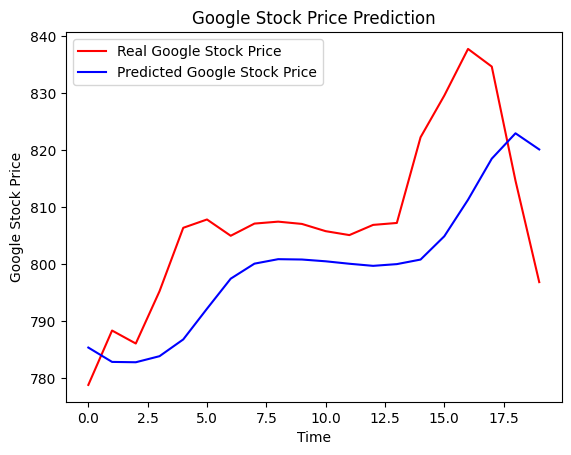

In [ ]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('/content/drive/MyDrive/Master BDBI 2022-2024/Intelligence Artificielle 2023/RNN/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
# Visualisation du resultat pour comprendre
q=pd.DataFrame(training_set)
print(q)


# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

# Visualisation du resultat pour comprendre
q=pd.DataFrame(training_set_scaled)
print(q)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

# Visualisation du resultat pour comprendre
q=pd.DataFrame(X_train)
print(q)
q=pd.DataFrame(y_train)
print(q)

# Reshaping

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

#Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True,  input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/MyDrive/Master BDBI 2022-2024/Intelligence Artificielle 2023/RNN/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

print('-------------------------------------------------')
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print =(predicted_stock_price)
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()







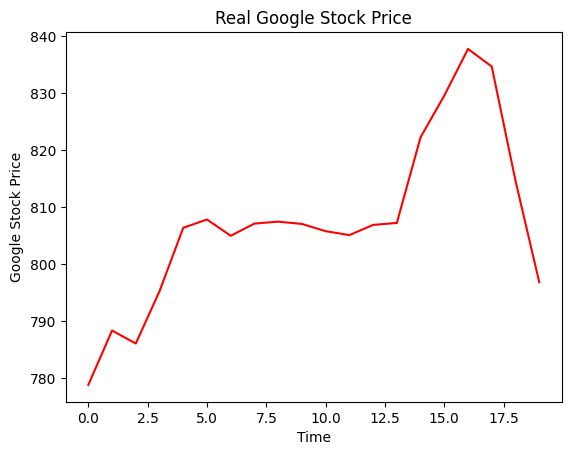

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.title('Real Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show()

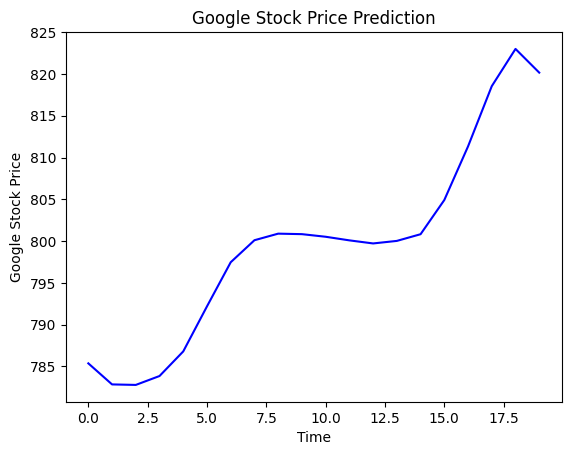

In [ ]:
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)